In [145]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
 
 

In [148]:
# Reading the dataset
def read_dataset():
    df = pd.read_csv("C:\\Users\\raprabhu\\Downloads\\bank_note_data.csv")
    # print(len(df.columns))
    X = df[df.columns[0:4]].values
    y = df[df.columns[4]]
 
    # Encode the dependent variable
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)


(1372, 4)
(1097, 4)
(1097, 2)
(275, 4)
n_dim 4
epoch :  0  -  cost:  0.7298712  - MSE:  5.03613651939194 - Train Accuracy:  0.562443
epoch :  1  -  cost:  0.6181565  - MSE:  4.648981835041076 - Train Accuracy:  0.74567
epoch :  2  -  cost:  0.58418995  - MSE:  4.541621264855894 - Train Accuracy:  0.75113946
epoch :  3  -  cost:  0.57169133  - MSE:  4.500362686795284 - Train Accuracy:  0.75022787
epoch :  4  -  cost:  0.56581384  - MSE:  4.485289647018821 - Train Accuracy:  0.7538742
epoch :  5  -  cost:  0.5627043  - MSE:  4.480411930222482 - Train Accuracy:  0.7547858
epoch :  6  -  cost:  0.56040984  - MSE:  4.478872927021018 - Train Accuracy:  0.7547858
epoch :  7  -  cost:  0.5550728  - MSE:  4.484967578911131 - Train Accuracy:  0.7584321
epoch :  8  -  cost:  0.55011016  - MSE:  4.489329819530545 - Train Accuracy:  0.76299
epoch :  9  -  cost:  0.54254264  - MSE:  4.494033754965253 - Train Accuracy:  0.76845944
epoch :  10  -  cost:  0.5358941  - MSE:  4.498080994466606 - Train Ac

epoch :  91  -  cost:  0.050730053  - MSE:  4.922680586064398 - Train Accuracy:  0.9972653
epoch :  92  -  cost:  0.05020782  - MSE:  4.934957979270666 - Train Accuracy:  0.9972653
epoch :  93  -  cost:  0.04970257  - MSE:  4.947150989420145 - Train Accuracy:  0.9972653
epoch :  94  -  cost:  0.04921334  - MSE:  4.9592557352548825 - Train Accuracy:  0.9972653
epoch :  95  -  cost:  0.048739128  - MSE:  4.971271089271929 - Train Accuracy:  0.9972653
epoch :  96  -  cost:  0.04827903  - MSE:  4.983201572294714 - Train Accuracy:  0.9972653
epoch :  97  -  cost:  0.047832303  - MSE:  4.995047143415143 - Train Accuracy:  0.9972653
epoch :  98  -  cost:  0.04739833  - MSE:  5.006805567335866 - Train Accuracy:  0.9972653
epoch :  99  -  cost:  0.0469766  - MSE:  5.018476817628565 - Train Accuracy:  0.9972653
Model saved in file: C:\Users\raprabhu\Downloads\BankNotes


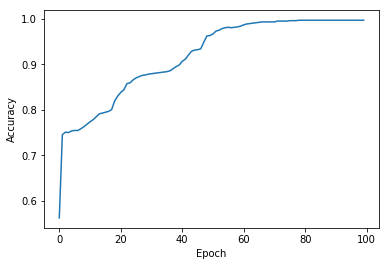

Test Accuracy:  1.0
MSE: 5.0185


In [147]:
# Define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode
 
 
# Read the dataset
X, Y = read_dataset()

 
# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)
 
# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
 
# Inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
 
# Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "C:\\Users\\raprabhu\\Downloads\\BankNotes"
 
# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
 
# Define the model
def multilayer_perceptron(x, weights, biases):
 
    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
 
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer
 
 
# Define the weights and the biases for each layer
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 
# Initialize all the variables
 
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
# Call your model defined
y = multilayer_perceptron(x, weights, biases)
 
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
# Calculate the cost and the accuracy for each epoch
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
 
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)
 
#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
# Print the final accuracy
 
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
# Print the final mean square error
 
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

In [165]:
prediction=tf.argmax(y,1)
correct_prediction=tf.equal(prediction, tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


for  i in range(754,768):
    prediction_run=sess.run(prediction,feed_dict={x:X[i].reshape(1,4)}) 
    print("original class:" , i,"Prediction values:", prediction_run, "actual value",Y[i])

original class: 754 Prediction values: [0] actual value [1. 0.]
original class: 755 Prediction values: [1] actual value [0. 1.]
original class: 756 Prediction values: [0] actual value [1. 0.]
original class: 757 Prediction values: [0] actual value [1. 0.]
original class: 758 Prediction values: [0] actual value [1. 0.]
original class: 759 Prediction values: [0] actual value [1. 0.]
original class: 760 Prediction values: [0] actual value [1. 0.]
original class: 761 Prediction values: [0] actual value [1. 0.]
original class: 762 Prediction values: [1] actual value [0. 1.]
original class: 763 Prediction values: [1] actual value [0. 1.]
original class: 764 Prediction values: [1] actual value [0. 1.]
original class: 765 Prediction values: [1] actual value [0. 1.]
original class: 766 Prediction values: [0] actual value [1. 0.]
original class: 767 Prediction values: [0] actual value [1. 0.]
